In [3]:
import os
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from torch import nn, optim
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
import torch.nn.functional as func
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
%matplotlib inline

In [5]:
sns.set(style='darkgrid')
sns.set_palette('deep')

In [8]:
# load the dataset
df = pd.read_csv('weatherAUS.csv')

In [9]:
# show first few records
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [10]:
# show dataset dimensions
df.shape

(145460, 23)

In [11]:
# show dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [12]:
# show the frequency distribution of RainTomorrow
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [13]:
# show percentage
df['RainTomorrow'].value_counts()/len(df)

No     0.758394
Yes    0.219146
Name: RainTomorrow, dtype: float64

In [14]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

array([[<Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'MinTemp'}>],
       [<Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'WindSpeed9am'}>]], dtype=object)

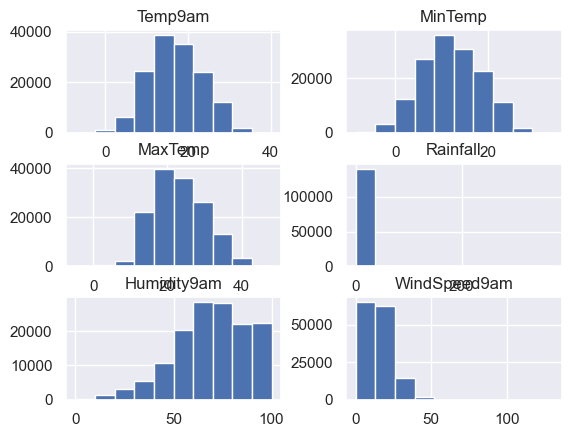

In [15]:
numerical = ['Temp9am', 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'WindSpeed9am']
df[numerical].hist()

In [16]:
df[numerical].describe()

,Temp9am,MinTemp,MaxTemp,Rainfall,Humidity9am,WindSpeed9am
count,143693.000000,143975.000000,144199.000000,142199.000000,142806.000000,143693.000000
mean,16.990631,12.194034,23.221348,2.360918,68.880831,14.043426
std,6.488753,6.398495,7.119049,8.478060,19.029164,8.915375
min,-7.200000,-8.500000,-4.800000,0.000000,0.000000,0.000000
25%,12.300000,7.600000,17.900000,0.000000,57.000000,7.000000
50%,16.700000,12.000000,22.600000,0.000000,70.000000,13.000000
75%,21.600000,16.900000,28.200000,0.800000,83.000000,19.000000
max,40.200000,33.900000,48.100000,371.000000,100.000000,130.000000


In [17]:
# fill missing values of normally-distributed columns with mean and skewed distribution with median
df['Temp9am'] = df['Temp9am'].fillna(value = df['Temp9am'].mean())
df['MinTemp'] = df['MinTemp'].fillna(value = df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(value = df['MaxTemp'].mean())
df['Rainfall'] = df['Rainfall'].fillna(value = df['Rainfall'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(value = df['Humidity9am'].median())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(value = df['WindSpeed9am'].median())

In [18]:
df['RainToday'] = df['RainToday'].fillna(value = df['RainToday'].mode()[0])

In [19]:
# convert data variable into dattime type
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [20]:
# extract year from the date
df['Year'] = df['Date'].dt.year

In [21]:
# extract month from the date
df['Month'] = df['Date'].dt.month

In [22]:
# extract day from the date
df['Day'] = df['Date'].dt.day

In [23]:
# encode location
le = preprocessing.LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])

In [24]:
# encode RainToday & RainTomorrow
df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)

In [25]:
X = df[['Temp9am', 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'WindSpeed9am', 'RainToday', 'Location', 'Year', 'Month', 'Day']]
y = df[['RainTomorrow']]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
X_train = torch.from_numpy(X_train.to_numpy()).float()
y_train = torch.squeeze(torch.from_numpy(y_train.to_numpy()).float())

In [28]:
X_test = torch.from_numpy(X_test.to_numpy()).float()
y_test = torch.squeeze(torch.from_numpy(y_test.to_numpy()).float())

In [29]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([116368, 11]) torch.Size([116368])
torch.Size([29092, 11]) torch.Size([29092])


In [30]:
# create the model
class Model(nn.Module):
  def __init__(self, n_features):
    super(Model, self).__init__()
    self.fc1 = nn.Linear(n_features, 11)
    self.fc2 = nn.Linear(11, 8)
    self.fc3 = nn.Linear(8, 5)
    self.fc4 = nn.Linear(5, 3)
    self.fc5 = nn.Linear(3, 1)
  def forward(self, x):
    x = func.relu(self.fc1(x))
    x = func.relu(self.fc2(x))
    x = func.relu(self.fc3(x))
    x = func.relu(self.fc4(x))
    return torch.sigmoid(self.fc5(x))

In [31]:
model = Model(X_train.shape[1])

In [32]:
criterion = nn.BCELoss()

In [33]:
optimiser = optim.Adam(model.parameters(), lr = 0.001)

In [34]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
X_train = X_train.to(device)
y_train = y_train.to(device)

X_test = X_test.to(device)
y_test = y_test.to(device)

model = model.to(device)

In [35]:
# define the loss function to compare the output with the target
criterion = criterion.to(device)

In [36]:
def calculate_accuracy(y_true, y_pred):
  predicted = y_pred.ge(.5).view(-1)
  return (y_true == predicted).sum().float() / len(y_true)

In [37]:
def round_tensor(t, decimal_places = 3):
  return round(t.item(), decimal_places)

In [48]:
# run the model
for epoch in range(1000):
    y_pred = model(X_train)
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y_train)
    if epoch % 100 == 0:
      train_acc = calculate_accuracy(y_train, y_pred)
      y_test_pred = model(X_test)
      y_test_pred = torch.squeeze(y_test_pred)
      test_loss = criterion(y_test_pred, y_test)
      test_acc = calculate_accuracy(y_test, y_test_pred)
      print (str('epoch ') + str(epoch) + str(' Train set: loss: ') + str(round_tensor(train_loss)) + str(', accuracy: ') + str(round_tensor(train_acc)) + str(' Test  set: loss: ') + str(round_tensor(test_loss)) + str(', accuracy: ') + str(round_tensor(test_acc)))
    optimiser.zero_grad()
    train_loss.backward()
    optimiser.step()

RuntimeError: CUDA error: CUBLAS_STATUS_EXECUTION_FAILED when calling cublasLtMatmul with transpose_mat1 1 transpose_mat2 1 m 11 n 116368 k 11 mat1_ld 11 mat2_ld 116368 result_ld 11 abcType 0 computeType 68 scaleType 0

In [ ]:
classes = ['No rain', 'Raining']

y_pred = model(X_test)
y_pred = y_pred.ge(.5).view(-1).cpu()
y_test = y_test.cpu()
print(classification_report(y_test, y_pred, target_names=classes))

In [39]:
conf_mat = confusion_matrix(y_test, y_pred)
df_conf_mat = pd.DataFrame(conf_mat, index = classes, columns = classes)
heat_map = sns.heatmap(df_conf_mat, annot = True, fmt = 'd')
heat_map.yaxis.set_ticklabels(heat_map.yaxis.get_ticklabels(), ha = 'right')
heat_map.xaxis.set_ticklabels(heat_map.xaxis.get_ticklabels(), ha = 'right')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ValueError: Found input variables with inconsistent numbers of samples: [29092, 116368]